# K-Means Clustering Example

Let's make some fake data that includes people clustered by income and age, randomly:

In [1]:
from numpy import random, array

#Create fake income/age clusters for N people in k clusters
def createClusteredData(N, k):
    random.seed(10)
    pointsPerCluster = float(N)/k
    X = []
    for i in range (k):
        incomeCentroid = random.uniform(20000.0, 200000.0)
        ageCentroid = random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([random.normal(incomeCentroid, 10000.0), random.normal(ageCentroid, 2.0)])
    X = array(X)
    return X

We'll use k-means to rediscover these clusters in unsupervised learning:

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


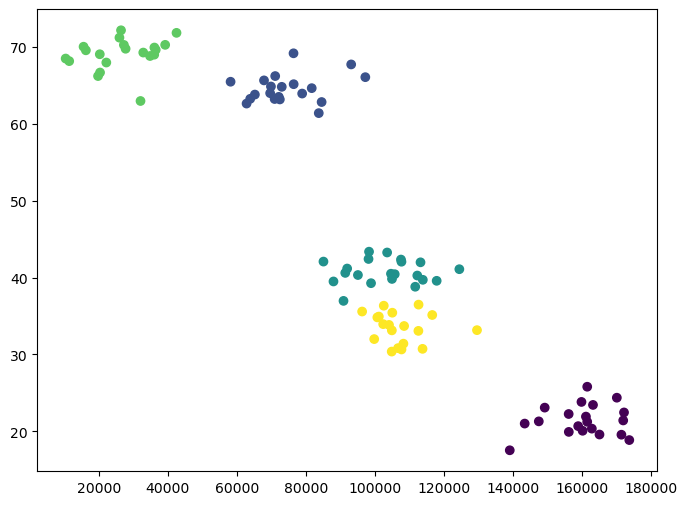

In [2]:
%matplotlib inline

# Let's see what our data looks like
# We'll create some clusters and plot them out
# We'll use a scatter plot, since we're dealing with two variables
# The x-axis will be income, and the y-axis will be age


from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random

data = createClusteredData(100, 5)

model = KMeans(n_clusters=5)

# Note I'm scaling the data to normalize it! Important for good results.
model = model.fit(scale(data))

# We can look at the clusters each data point was assigned to
print(model.labels_)

# And we'll visualize it:
plt.figure(figsize=(8, 6))
plt.scatter(data[:,0], data[:,1], c=model.labels_.astype(float))
plt.show()

## Activity

- What happens if you don't scale the data? 
- What happens if you choose different values of K? In the real world, you won't know the "right" value of K to start with - you'll need to converge on it yourself.

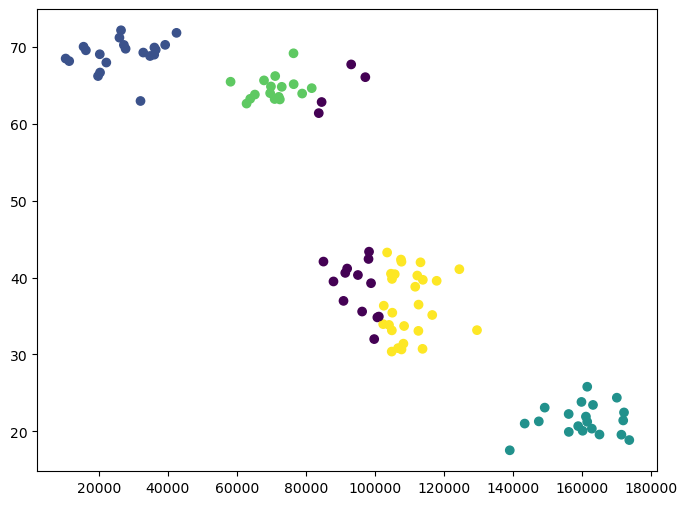

In [3]:
# whithout scaling the data 
model = KMeans(n_clusters=5)
model = model.fit(data)
plt.figure(figsize=(8, 6))
plt.scatter(data[:,0], data[:,1], c=model.labels_.astype(float))
plt.show()


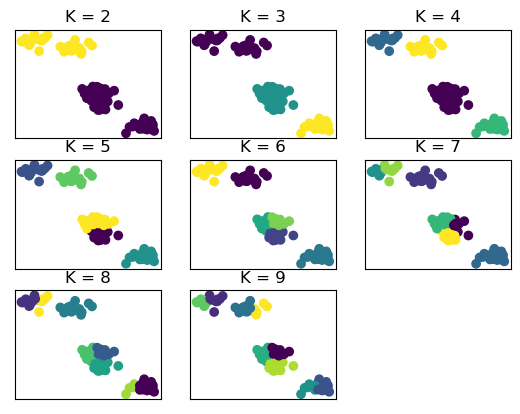

In [8]:
# lets try with different K values and subplots in one figure
Kmaxvalue = 10
for K in range(2, Kmaxvalue):
    plt.subplot(3, 3, K-1)
    model = KMeans(n_clusters=K)
    model = model.fit(scale(data))
    plt.scatter(data[:,0], data[:,1], c=model.labels_.astype(float))
    plt.title('K = ' + str(K))
    plt.xticks(())
    plt.yticks(())
plt.show()

